## 主成分分析法
* 一个非监督的机器学习算法
* 主要用于数据的降维
* 通过降维，可以发现更便于人类理解的特征
* 其他应用：可视化；去噪

### 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plot

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,10.,size = 100)

In [3]:
X.shape

(100, 2)

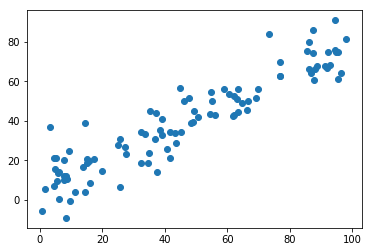

In [4]:
plot.scatter(X[:,0],X[:,1])

#### demean 

In [5]:
def demean(X):
    return X - np.mean(X, axis = 0)

In [6]:
X_demean = demean(X)

### 批量梯度上升法

In [7]:
def f(w,X):
    return np.sum((X.dot(w)**2)) / len(X)

In [8]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2 /len(X)

In [9]:
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2, X)) / (2 * epsilon)
    return res

In [10]:
def direction(w):
    return w / np.linalg.norm(w)
def gradient_aescent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    
    w = direction(initial_w)
    i_iter = 0
    
    while i_iter < n_iters:
        
        gradient = df(w,X)
        last_w = w
        w = w+eta * gradient
        w = direction(w) # 每次求一个单位方向
        
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
            
        i_iter += 1
    return w


In [11]:
initial_w = np.random.random(X.shape[1]) # 不能从零向量开始
initial_w

array([0.48634566, 0.06768634])

In [12]:
eta = 0.001

In [13]:
# PCA不能使用StandardScler进行标准化，因为在标准化的过程方差发生改变了

In [14]:
gradient_aescent(df_debug,X_demean,initial_w,eta)

array([0.79333147, 0.60878993])

In [15]:
gradient_aescent(df_math,X_demean,initial_w,eta)

array([0.79333147, 0.60878993])

In [16]:
w = gradient_aescent(df_math,X_demean,initial_w,eta)

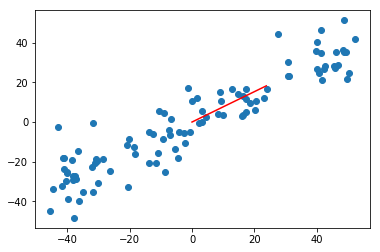

In [17]:
plot.scatter(X_demean[:,0],X_demean[:,1])
plot.plot([0,w[0]*30],[0,w[1]*30],color = "r")

In [18]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0., 100., size = 100)
X2[:,1] = 0.75 * X2[:,0] + 3.

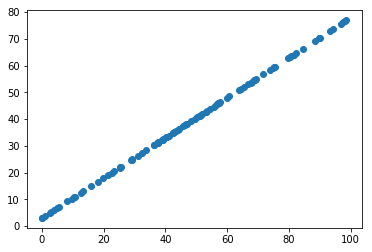

In [19]:
plot.scatter(X2[:,0],X2[:,1])